# EDA pagos en 2 años

Needed libraries

In [38]:
#import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import plotly.express as px
from scipy import stats
from scipy.stats import norm, skew # para estadisticas


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # limitar flotantes a 3 decimales


from subprocess import check_output


Load dataset

In [39]:
df = pd.read_csv(r'data\train.csv',encoding='latin-1')
df.head()

Id  target  RevolvingUtilizationOfUnsecuredLines  age   
0   44164       0                                 0.768  68y  \
1   95356       0                                 0.290  52y   
2  108917       0                                 0.000  54y   
3   99039       0                                 0.046  66y   
4  116168       0                                 0.169  45y   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome   
0                                     1      0.688       2178.000  \
1                                     0      0.385       3750.000   
2                                     0      0.347       6833.000   
3                                     1      0.408       5200.000   
4                                     0   4702.000            NaN   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate   
0                               12                        0  \
1                               16                        0   
2                                8                        0   
3                                6                        0   
4                               10                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse   
0                             1                                     0  \
1                             1                                     0   
2                             1                                     0   
3                             1                                     0   
4                             3                                     0   

   NumberOfDependents  
0               0.000  
1               1.000  
2               0.000  
3               1.000  
4               1.000

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

Dataframe Columns meaning:
- Revolving Utilization of Unsecured Lines (RUUL) -- Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.
- DebtRatio -- Monthly debt payments, alimony,living costs divided by monthy gross income
- NumberOfOpenCreditLinesAndLoans
- NumberOfTime30-59DaysPastDueNotWorse
- MonthlyIncome
- NumberOfTimes90DaysLate
- NumberRealEstateLoansOrLines
- NumberOfTime60-89DaysPastDueNotWorse
- NumberOfDependents
- age

# Data Visualization and Feature Engineering

In [41]:
df['age'] = df['age'].apply(lambda x: str(x).split('y')[0])
df['age'] = df['age'].apply(int)

In [47]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71421 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    71421 non-null  int64  
 1   target                                71421 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  71421 non-null  float64
 3   age                                   71421 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  71421 non-null  int64  
 5   DebtRatio                             71421 non-null  float64
 6   MonthlyIncome                         71421 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       71421 non-null  int64  
 8   NumberOfTimes90DaysLate               71421 non-null  int64  
 9   NumberRealEstateLoansOrLines          71421 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  71421 non-null  int64  
 11  NumberOfDependents  

In [48]:
df.describe()

Id    target  RevolvingUtilizationOfUnsecuredLines       age   
count  71421.000 71421.000                             71421.000 71421.000  \
mean   75026.357     0.067                                 5.800    52.154   
std    43293.315     0.249                               236.839    14.609   
min        2.000     0.000                                 0.000     0.000   
25%    37436.000     0.000                                 0.031    41.000   
50%    75041.000     0.000                                 0.160    52.000   
75%   112573.000     0.000                                 0.564    62.000   
max   149998.000     1.000                             29110.000   103.000   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome   
count                             71421.000  71421.000      71421.000  \
mean                                  0.402    343.053       6649.145   
std                                   3.947   2498.026       9492.042   
min                                   0.000      0.000          0.000   
25%                                   0.000      0.170       3813.000   
50%                                   0.000      0.357       6416.000   
75%                                   0.000      0.764       7500.000   
max                                  98.000 329664.000    1560100.000   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate   
count                        71421.000                71421.000  \
mean                             8.521                    0.245   
std                              5.145                    3.921   
min                              0.000                    0.000   
25%                              5.000                    0.000   
50%                              8.000                    0.000   
75%                             11.000                    0.000   
max                             57.000                   98.000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse   
count                     71421.000                             71421.000  \
mean                          1.032                                 0.221   
std                           1.141                                 3.906   
min                           0.000                                 0.000   
25%                           0.000                                 0.000   
50%                           1.000                                 0.000   
75%                           2.000                                 0.000   
max                          32.000                                98.000   

       NumberOfDependents  
count           71421.000  
mean                0.756  
std                 1.112  
min                 0.000  
25%                 0.000  
50%                 0.000  
75%                 1.000  
max                13.000

In [49]:
#calculate mean of 'target'
print('Mean of target:', df['target'].mean())
#calculate median of 'target' 
print('Median of target:',df['target'].median())
#calculate standard deviation of 'target'
print('Standard deviation of target:', df['target'].std())


Mean of target: 0.06661906162053177
Median of target: 0.0
Standard deviation of target: 0.24936285386416238


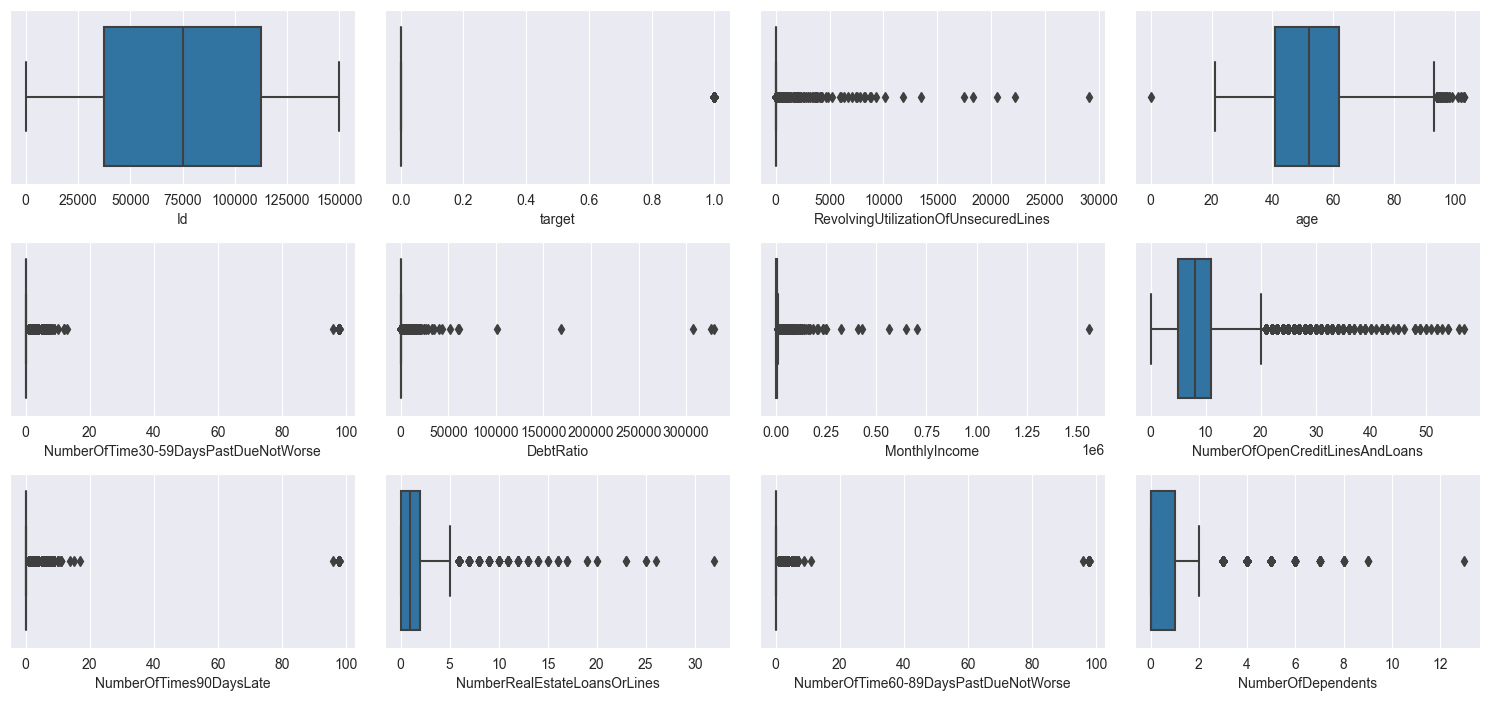

In [50]:
cols = 4
rows = 4
num_cols = df.columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

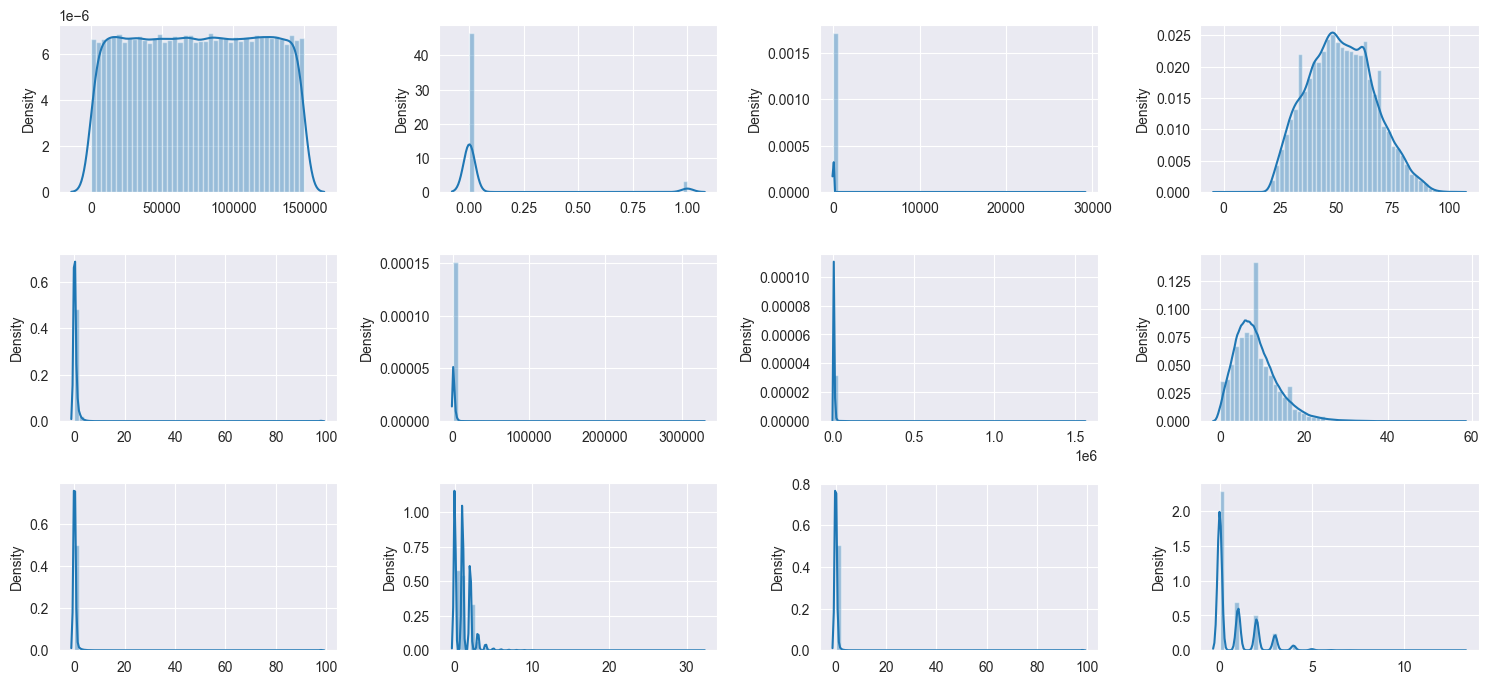

In [51]:
cols = 4
rows = 4
num_cols = df.columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.distplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

## Outliers search

In [52]:
df['age'].value_counts().sort_index()

age
0        1
21      78
22     199
23     285
24     348
      ... 
98       4
99       1
101      1
102      2
103      3
Name: count, Length: 83, dtype: int64

Text(0.5, 1.0, 'Age of clients that did not complete payments in two years')

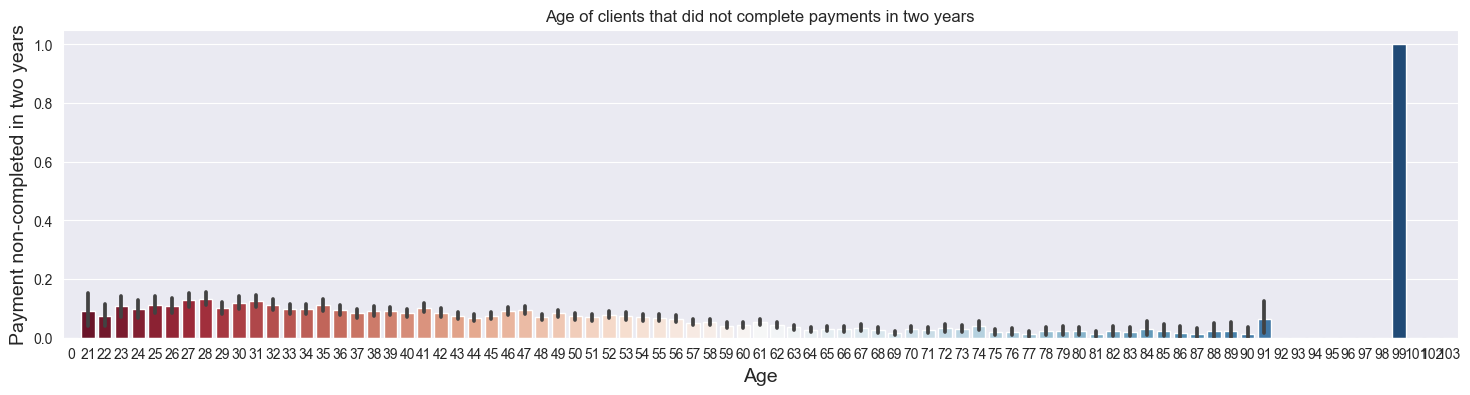

In [53]:
plt.figure(figsize = (18,4))
sns.barplot(data = df,x = 'age', y = 'target',palette = 'RdBu')
plt.xlabel("Age", size=14)
plt.ylabel("Payment non-completed in two years", size=14)
plt.title('Age of clients that did not complete payments in two years')

In [54]:
#Outliers removal from age column
df_1 = df[~((df['age'] > 99) & (df['age'] < 20))]

In [56]:
#Outliers removal from age column
df_1 = df_1[~(df_1['NumberOfTime30-59DaysPastDueNotWorse'] > 80)]
df_1['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count   71308.000
mean        0.247
std         0.697
min         0.000
25%         0.000
50%         0.000
75%         0.000
max        13.000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

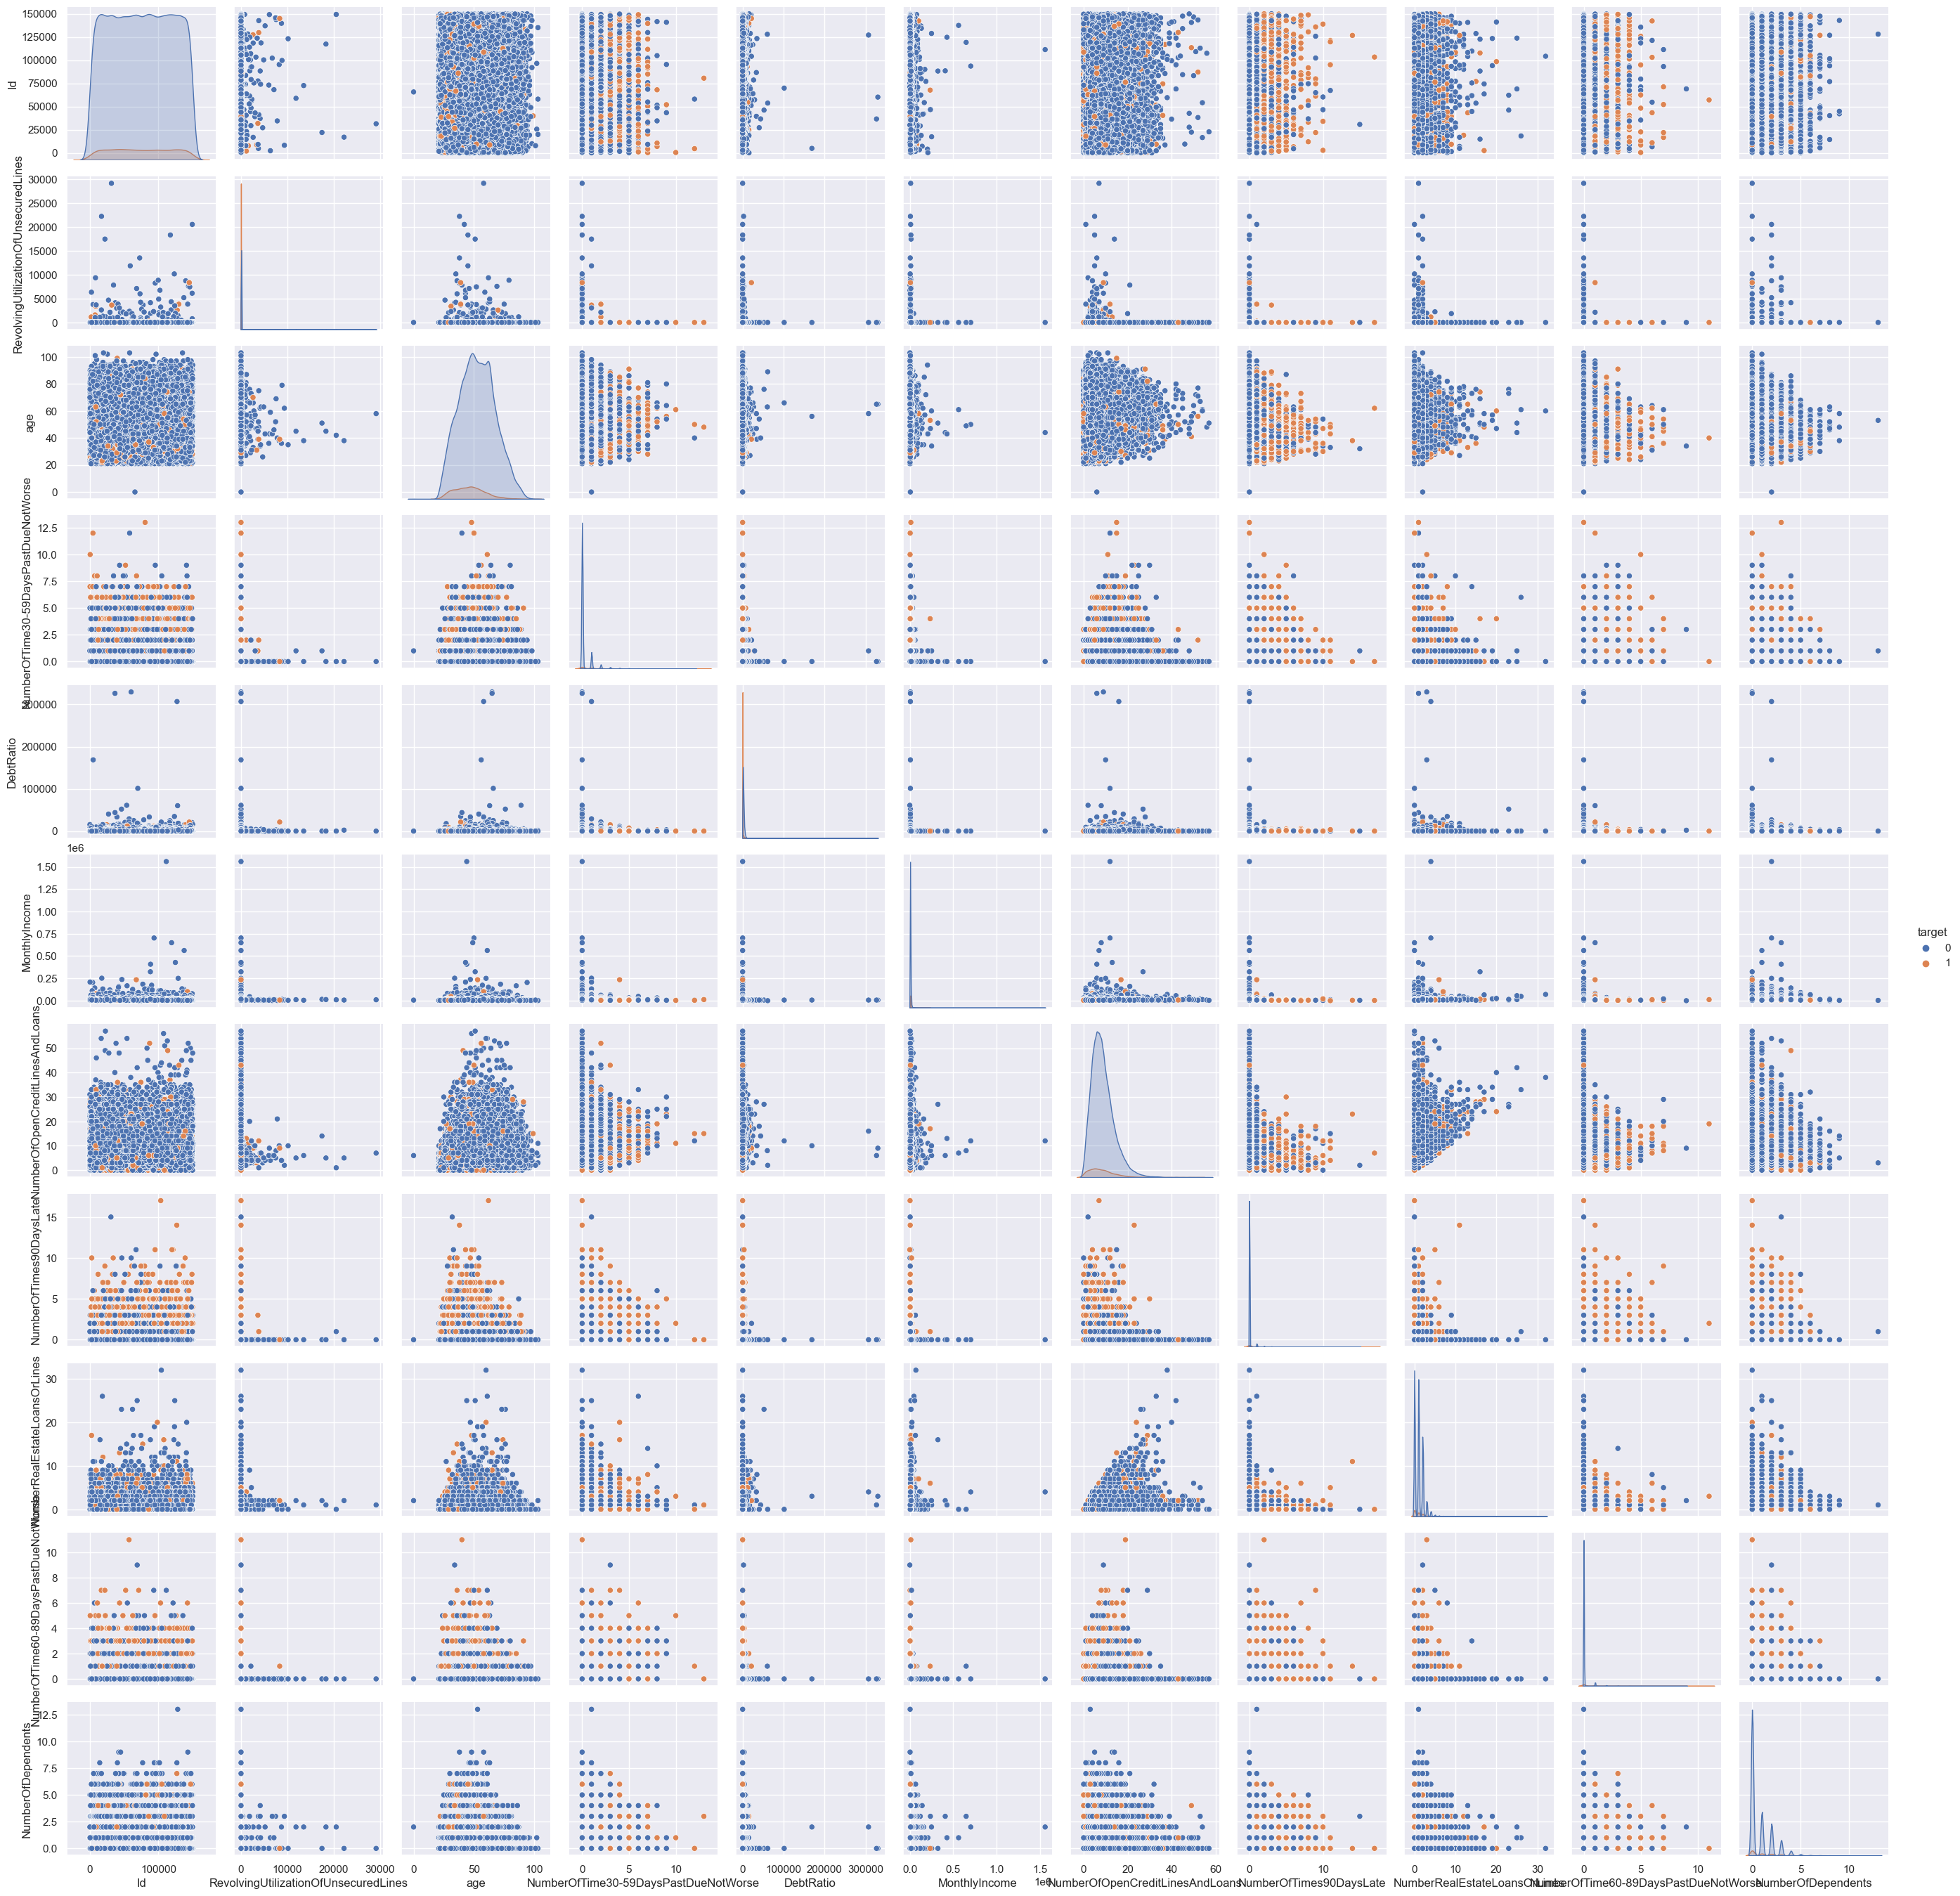

In [62]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.pairplot(df_1,hue='target');

**Bivariate analysis**

In [59]:
px.scatter(data_frame = df_1,x = 'DebtRatio',y = 'target')

In [60]:
px.scatter(data_frame = df_1,x = 'NumberOfTimes90DaysLate',y = 'target')

# Comprobación de la asimetría y transformación de la columna target


 mu = 0.07 and sigma = 0.25



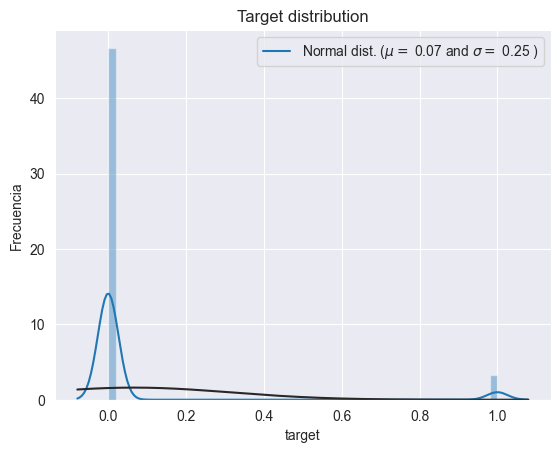

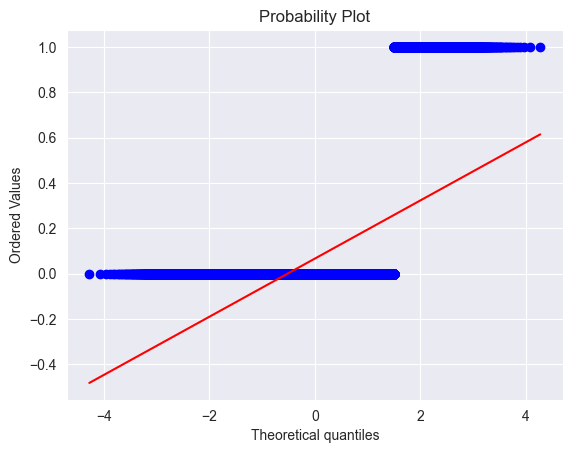

In [ ]:
sns.distplot(df['target'] , fit=norm)
# Obtener los parámetros ajustados utilizados por la función
(mu, sigma) = norm.fit(df['target'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# plot de la distribucion
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Target distribution')

fig = plt.figure()
res = stats.probplot(df['target'], plot=plt)
plt.show()

<Axes: >

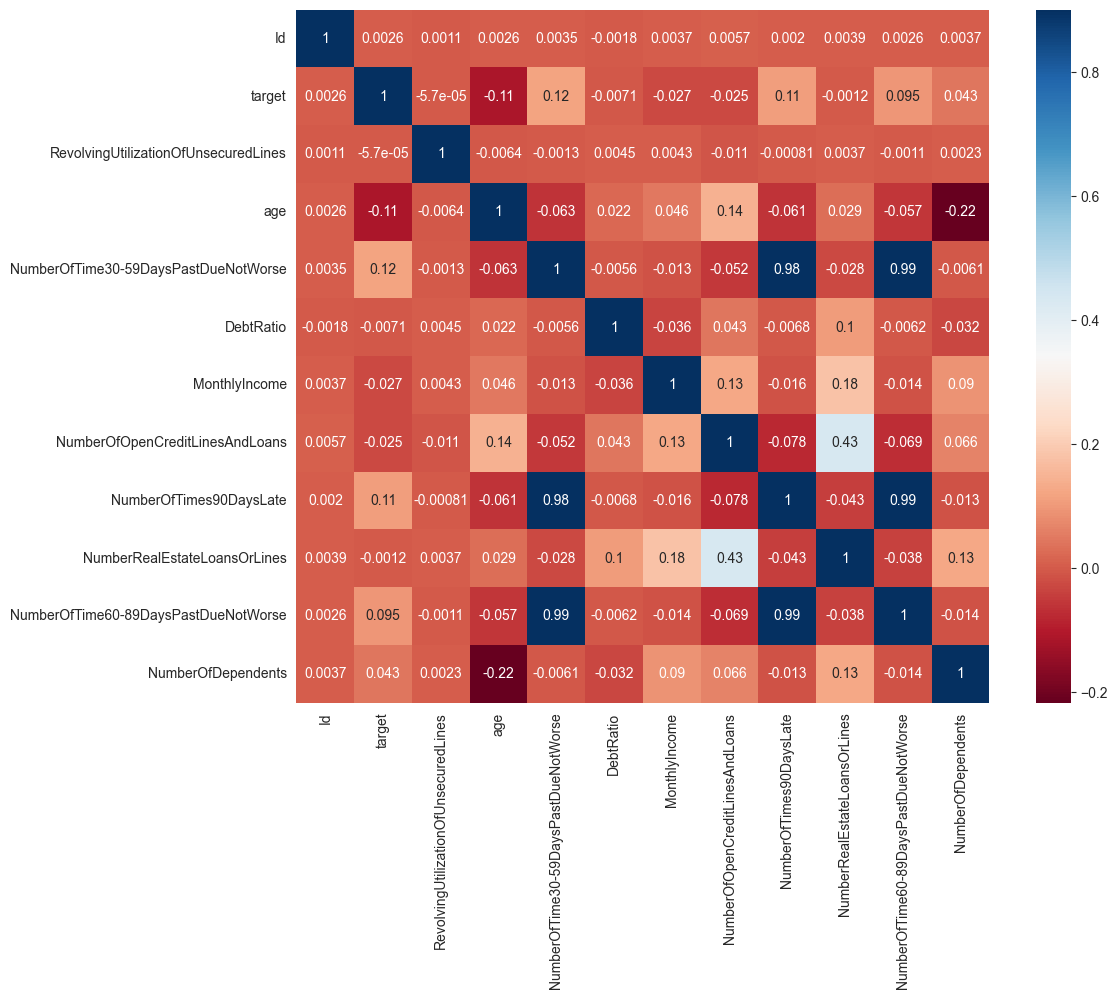

In [ ]:
#Correlacion 
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap = 'RdBu',annot = True)

**Existe intercorrelación entre algunas variables**

In [95]:
df_clean = df.drop(columns = ['Id', 'NumberOfTime30-59DaysPastDueNotWorse'])

In [97]:
df_clean.columns

Index(['target', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [98]:
df.head()

Id  target  RevolvingUtilizationOfUnsecuredLines  age   
0   44164       0                                 0.768   68  \
1   95356       0                                 0.290   52   
2  108917       0                                 0.000   54   
3   99039       0                                 0.046   66   
4  116168       0                                 0.169   45   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome   
0                                     1      0.688       2178.000  \
1                                     0      0.385       3750.000   
2                                     0      0.347       6833.000   
3                                     1      0.408       5200.000   
4                                     0   4702.000            NaN   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate   
0                               12                        0  \
1                               16                        0   
2                                8                        0   
3                                6                        0   
4                               10                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse   
0                             1                                     0  \
1                             1                                     0   
2                             1                                     0   
3                             1                                     0   
4                             3                                     0   

   NumberOfDependents  
0               0.000  
1               1.000  
2               0.000  
3               1.000  
4               1.000

# Model Building

In [47]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb


In [24]:
X = df.iloc[:,:-1]
y = df['Price_euros']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [26]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

**Linear Reggression**

In [48]:
lm = LinearRegression()
lm.fit(X_train, y_train)
score = rmsle_cv(lm)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.4015 (0.0243)



**Lasso Regression**

In [27]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.4015 (0.0240)



**Elastic Net Regression**

In [28]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.4015 (0.0240)



**Kernel Ridge Regression**

In [29]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3150 (0.0139)



**Gradient Boosting Regression**

In [30]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1780 (0.0182)



**XGBoost Regression**

In [49]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1, verbosity=0)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1819 (0.0222)



**LGBM**

In [64]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [65]:
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1871 (0.0198)



In [33]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.4015 (0.0240)



In [34]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3150 (0.0139)



# Fitting the best model and getting the predictions array

In [43]:
GBoost.fit(X_train,y_train)
gboost_pred = GBoost.predict(X_test)


In [44]:
result = pd.DataFrame({'Y_TEST':y_test.values,'Y_PRED' : pd.Series(gboost_pred).values})

In [45]:
result

Y_TEST  Y_PRED
0     6.739   6.625
1     5.356   5.204
2     7.409   7.560
3     7.208   7.317
4     7.228   7.004
..      ...     ...
132   6.683   6.664
133   7.201   7.155
134   7.871   7.759
135   7.534   7.374
136   7.313   7.510

[137 rows x 2 columns]

In [46]:
px.line(data_frame = result)